The goal of this notebook is to build a visualization of the Illiad using a recurrent theme of this epic work: the 

# Getting the text 

Fortunaly for us, we live in an age where 2500 year old epics can be found in digitial form. The Illiad can be found Project Gutenberg in a text form. Let's download it:

In [3]:
import requests

In [4]:
r = requests.get('http://www.gutenberg.org/cache/epub/2199/pg2199.txt')

In [5]:
illiad = r.text
illiad = illiad.replace('\r', '').replace('\n', ' ')

In [6]:
illiad[:100]

'\ufeffThe Project Gutenberg EBook of The Iliad, by Homer  This eBook is for the use of anyone anywhere at'

In [7]:
print(illiad[:1000])

﻿The Project Gutenberg EBook of The Iliad, by Homer  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net   Title: The Iliad  Author: Homer  Translator: Samuel Butler  Posting Date: June 13, 2010 [EBook #2199] Release Date: June, 2000 First Posted: September 18, 1999 Last Updated: December 12, 2004  Language: English   *** START OF THIS PROJECT GUTENBERG EBOOK THE ILIAD ***     Produced by Jim Tinsley.  HTML version by Al Haines.           THE ILIAD OF HOMER     Rendered into English Prose for   the use of those who cannot   read the original   by  Samuel Butler      BOOK I    The quarrel between Agamemnon and Achilles--Achilles withdraws   from the war, and sends his mother Thetis to ask Jove to help   the Trojans--Scene between Jove and Juno on Olympus.  Sing, O goddess, the anger of Achille

Some sanity checks.

In [8]:
assert '\n' not in illiad
assert illiad.find('\n')
assert illiad.find('\r')

# Splitting into rhapsodies 

Now, let's split the Illiad in its different songs, or rhapsodies, since it is just a bunch of characters right now. We will use regular expressions to do this.

In [9]:
import re

In [10]:
rhapsodies = re.split(r'(?: BOOK [IVX]+\s+)', illiad)[1:]

Let's do some sanity checks:

In [11]:
len(rhapsodies)

24

In [12]:
from ipywidgets import interact
from IPython.display import HTML, display

In [13]:
@interact
def display_rhapsody_start(n=(0, 23)):
    display(HTML(rhapsodies[n][:200]))

In [14]:
for i in range(24):
    display_rhapsody_start(i)

Okay, this is all good. Let's move on to the next step: finding the names of sons mentioned in the rhapsodies.

# Looking for sons

In [15]:
rhapsody0 = rhapsodies[0]

In [16]:
pattern1 = re.compile(r'\w+\b[ ,]?sons? of (?:[A-Z][a-z]+)')
pattern1.findall(rhapsody0)

['Achilles son of Peleus',
 'the son of Atreus',
 'the son of Jove',
 'the son of Atreus',
 'two sons of Atreus',
 'Calchas son of Thestor',
 'noble son of Atreus',
 'The son of Peleus',
 'the son of Atreus',
 'the son of Peleus',
 'the son of Peleus',
 'the son of Atreus',
 'the son of Peleus',
 'the son of Atreus',
 'Theseus son of Aegeus',
 'The son of Peleus',
 'the son of Menoetius',
 'the son of Atreus',
 'two sons of Atreus',
 'the son of Atreus',
 'the son of Saturn',
 'the son of Saturn',
 'mighty son of Saturn',
 'the son of Saturn',
 'Dread son of Saturn']

In [17]:
len(pattern1.findall(rhapsody0))

25

In [18]:
pattern2 = re.compile(r',?sons? of (?:[A-Z][a-z]+)')
pattern2.findall(rhapsody0)

['son of Peleus',
 'son of Atreus',
 'son of Jove',
 'son of Atreus',
 'sons of Atreus',
 'son of Jove',
 'son of Thestor',
 'son of Atreus',
 'son of Peleus',
 'son of Peleus',
 'son of Atreus',
 'son of Peleus',
 'son of Atreus',
 'son of Peleus',
 'son of Atreus',
 'son of Atreus',
 'son of Peleus',
 'son of Atreus',
 'son of Aegeus',
 'son of Peleus',
 'son of Menoetius',
 'son of Atreus',
 'son of Peleus',
 'son of Atreus',
 'sons of Atreus',
 'son of Atreus',
 'son of Saturn',
 'son of Saturn',
 'son of Saturn',
 'son of Saturn',
 'son of Saturn']

In [19]:
len(pattern2.findall(rhapsody0))

31

Let's use the second pattern for extracting names of fathers.

In [20]:
from collections import OrderedDict

In [21]:
by_rhapsody = []
for rhapsody in rhapsodies:
    name_dict = OrderedDict()
    for name in pattern2.findall(rhapsody):
        if name in name_dict:
            name_dict[name] += 1
        else:
            name_dict[name] = 1
    by_rhapsody.append(name_dict)

# Graphing the output 

## Tables along rhapsodies 

Let's now transform the output to a matrix. First we need to find all unique names. 

In [22]:
unique_names = []
for name_dict in by_rhapsody:
    for name in name_dict:
        if not name in unique_names:
            unique_names.append(name)

In [23]:
len(unique_names)

163

In [24]:
unique_names

['son of Peleus',
 'son of Atreus',
 'son of Jove',
 'sons of Atreus',
 'son of Thestor',
 'son of Aegeus',
 'son of Menoetius',
 'son of Saturn',
 'son of Neleus',
 'son of Laertes',
 'son of Tydeus',
 'sons of Mars',
 'son of Azeus',
 'son of Naubolus',
 'son of Oileus',
 'son of Telamon',
 'son of Chalcodon',
 'son of Peteos',
 'son of Talaus',
 'son of Ancaeus',
 'son of Cteatus',
 'son of Amarynces',
 'son of King',
 'son of Augeas',
 'son of Andraemon',
 'son of Hercules',
 'sons of Hercules',
 'sons of King',
 'son of Selepus',
 'son of Iphiclus',
 'son of Phylacus',
 'son of Admetus',
 'sons of Aesculapius',
 'son of Euaemon',
 'son of Pirithous',
 'son of Coronus',
 'son of Caeneus',
 'son of Tenthredon',
 'son of Pheres',
 'sons of Antenor',
 'son of Lycaon',
 'sons of Merops',
 'son of Hyrtacus',
 'son of Teutamus',
 'son of Troezenus',
 'son of Ceos',
 'sons of Talaemenes',
 'sons of Nomion',
 'son of Antenor',
 'son of Ptolemaeus',
 'son of Peiraeus',
 'son of Capaneus',
 

Now, let's build the matrix.

In [25]:
import numpy as np

In [26]:
name_matrix = np.zeros((len(rhapsodies), len(unique_names)), np.int)
for ind, name_dict in enumerate(by_rhapsody):
    for name in name_dict:
        name_matrix[ind, unique_names.index(name)] = name_dict[name]

Now, we can plot this:

In [27]:
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

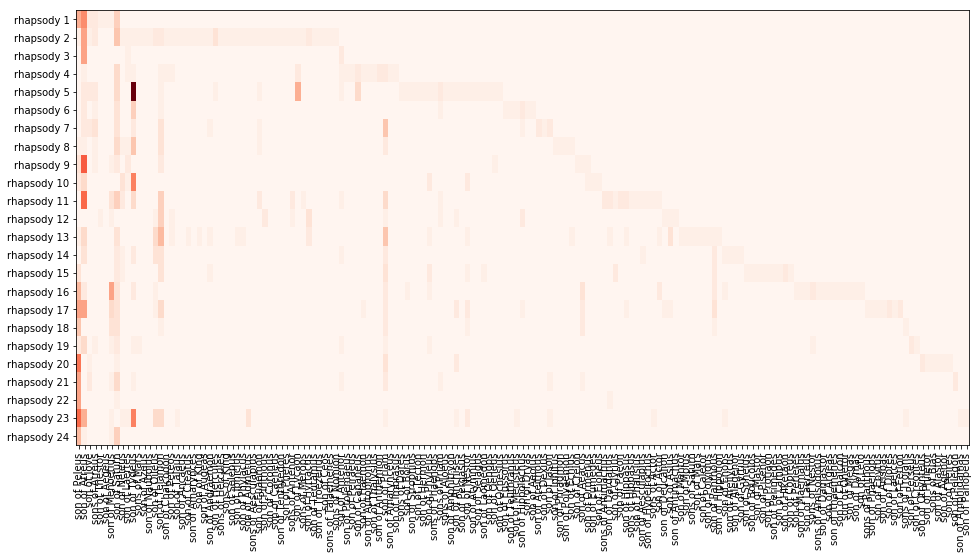

In [29]:
plt.figure(figsize=(16, 8))
plt.imshow(name_matrix, cmap='Reds', aspect='auto')
plt.xticks(np.arange(len(unique_names)), unique_names, rotation=90);
plt.yticks(np.arange(len(rhapsodies)), ['rhapsody {}'.format(i) for i in range(1, 25)]);

What about doing the figure in the other direction?

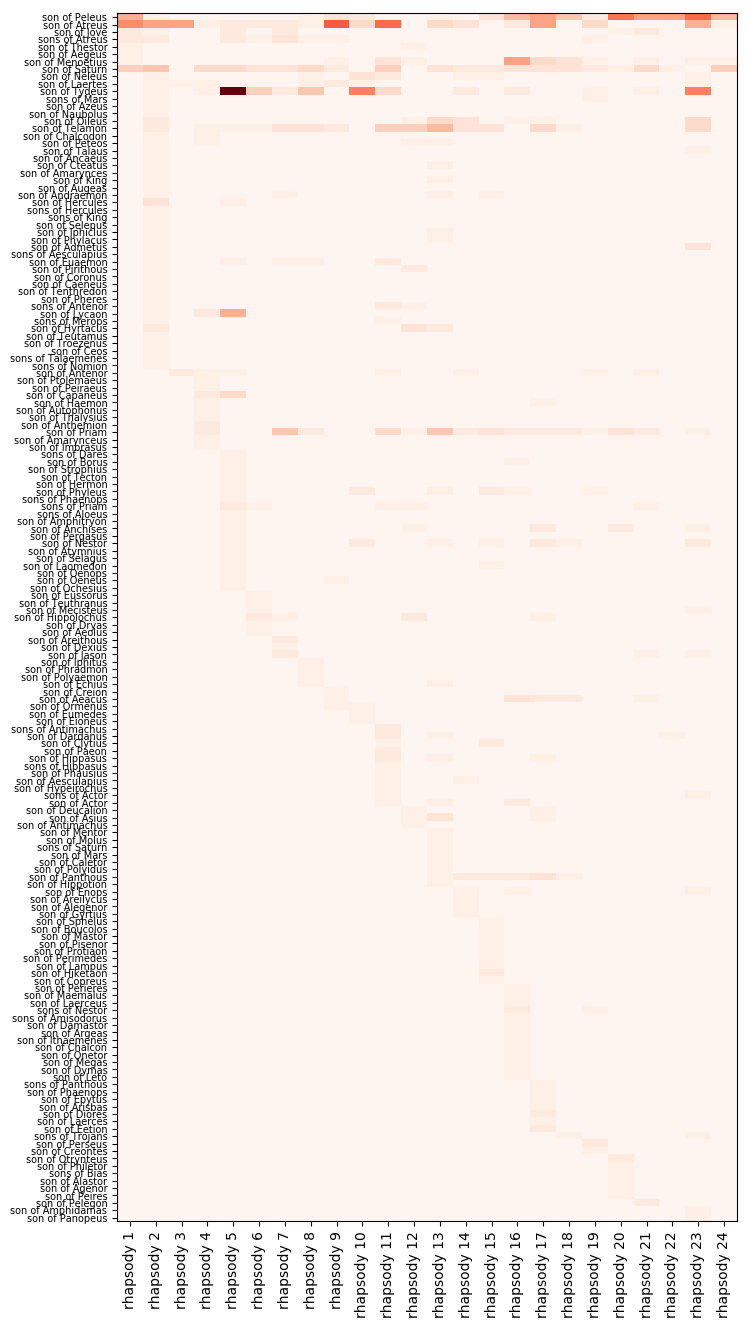

In [30]:
plt.figure(figsize=(8, 16), dpi=100)
plt.imshow(name_matrix.T, cmap='Reds', aspect='auto')
plt.yticks(np.arange(len(unique_names)), unique_names, rotation=0, fontsize=7);
plt.xticks(np.arange(len(rhapsodies)), ['rhapsody {}'.format(i) for i in range(1, 25)], rotation=90);

## Using Bokeh 

Let's do another plot: we just draw this data as spikes.

In [31]:
import bokeh.charts as bc
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, BoxSelectTool
import pandas as pd

/Users/kappamaki/anaconda/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


In [32]:
output_notebook()

Loading BokehJS ...

In [33]:
df = pd.DataFrame(data=name_matrix, columns=unique_names, index=['rhapsody {}'.format(i) for i in range(1, 25)])

In [34]:
selection = df.sum(numeric_only=True) > 10

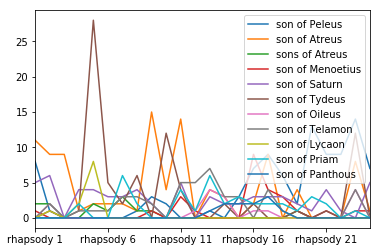

In [35]:
df[df.columns[selection]].plot()

In [36]:
df.index

Index(['rhapsody 1', 'rhapsody 2', 'rhapsody 3', 'rhapsody 4', 'rhapsody 5',
       'rhapsody 6', 'rhapsody 7', 'rhapsody 8', 'rhapsody 9', 'rhapsody 10',
       'rhapsody 11', 'rhapsody 12', 'rhapsody 13', 'rhapsody 14',
       'rhapsody 15', 'rhapsody 16', 'rhapsody 17', 'rhapsody 18',
       'rhapsody 19', 'rhapsody 20', 'rhapsody 21', 'rhapsody 22',
       'rhapsody 23', 'rhapsody 24'],
      dtype='object')

In [37]:
hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )
TOOLS = [hover]
chart = bc.Line(df[df.columns[selection]], legend='top_right', width=800, height=500, tools=TOOLS)
show(chart)

A bit of experimenting.

In [38]:
from bokeh.models.sources import ColumnDataSource

In [39]:
source = ColumnDataSource(df)

In [40]:
source.data

{'index': array(['rhapsody 1', 'rhapsody 2', 'rhapsody 3', 'rhapsody 4',
        'rhapsody 5', 'rhapsody 6', 'rhapsody 7', 'rhapsody 8',
        'rhapsody 9', 'rhapsody 10', 'rhapsody 11', 'rhapsody 12',
        'rhapsody 13', 'rhapsody 14', 'rhapsody 15', 'rhapsody 16',
        'rhapsody 17', 'rhapsody 18', 'rhapsody 19', 'rhapsody 20',
        'rhapsody 21', 'rhapsody 22', 'rhapsody 23', 'rhapsody 24'], dtype=object),
 'son of Actor': rhapsody 1     0
 rhapsody 2     0
 rhapsody 3     0
 rhapsody 4     0
 rhapsody 5     0
 rhapsody 6     0
 rhapsody 7     0
 rhapsody 8     0
 rhapsody 9     0
 rhapsody 10    0
 rhapsody 11    1
 rhapsody 12    0
 rhapsody 13    1
 rhapsody 14    0
 rhapsody 15    0
 rhapsody 16    2
 rhapsody 17    0
 rhapsody 18    0
 rhapsody 19    0
 rhapsody 20    0
 rhapsody 21    0
 rhapsody 22    0
 rhapsody 23    0
 rhapsody 24    0
 Name: son of Actor, dtype: int64,
 'son of Admetus': rhapsody 1     0
 rhapsody 2     1
 rhapsody 3     0
 rhapsody 4     0
 rh

In [41]:
from bokeh.models import HoverTool

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@name"),
        ]
    )

p = figure(plot_width=400, plot_height=400,  tools=[hover])
# add a line renderer with a NaN
nan = float('nan')
p.line([1, 2, 3, nan, 4, 5], [6, 7, 2, 4, 4, 5], name='line', line_width=2)
show(p)

In [42]:
transposed_df = df.transpose()

In [43]:
tooltips= [
    ('Name', '$index'),
    ('When', '$x'),
    ('y', '$y'),
    ('desc', '$columns')
]
chart = bc.Line(transposed_df, tooltips=tooltips)
show(chart)

## Adjacency 

What about doing something like the [Les Mis graph found in the bokeh library examples](http://bokeh.pydata.org/en/latest/docs/gallery/les_mis.html)?

This time, we need to build an adjacency matrix.

In [44]:
adjacency = np.zeros((len(unique_names), len(unique_names)), np.int)
for name_dict in by_rhapsody:
    for name in unique_names:
        for other_name in name_dict:
            if name in name_dict:
                adjacency[unique_names.index(name), unique_names.index(other_name)] = name_dict[other_name] + name_dict[name]

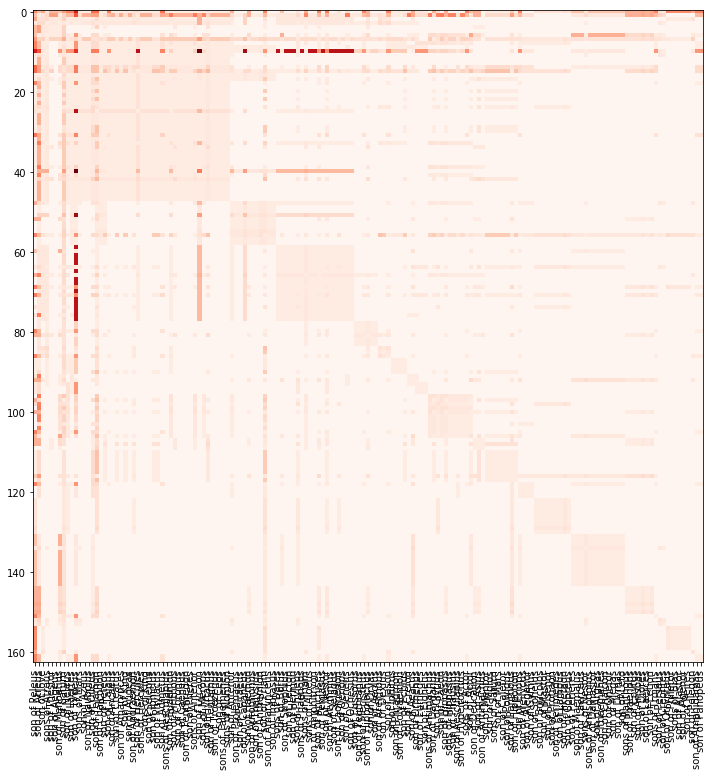

In [45]:
plt.figure(figsize=(12, 12))
plt.imshow(adjacency, cmap='Reds', aspect='auto')
plt.xticks(np.arange(len(unique_names)), unique_names, rotation=90);

We need to cluster this graph...

Let's try this.

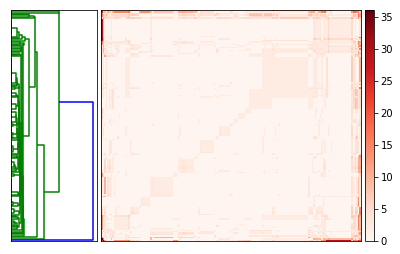

In [46]:
import scipy.cluster.hierarchy as sch

# Compute and plot dendrogram.
fig = plt.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(adjacency, method='centroid')
Z = sch.dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
D = adjacency[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap='Reds')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
plt.colorbar(im, cax=axcolor)


More research remains to be done.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage




Digital humanities:
    - https://de.dariah.eu/tatom/case_study_racine.html
    - https://de.dariah.eu/tatom/index.html
    - http://www.karsdorp.io/python-course/

Adjacency plots and graphs:
    - https://bost.ocks.org/mike/miserables/
    - http://neoformix.com/2013/NovelViews.html
    - https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

## Using Holoviews 

In [47]:
import holoviews as hv
hv.extension('bokeh', 'matplotlib')

In [55]:
df['rhapsody'] = df.index
df = df.reset_index()

In [57]:
df.head()

,index,son of Peleus,son of Atreus,son of Jove,sons of Atreus,son of Thestor,son of Aegeus,son of Menoetius,son of Saturn,son of Neleus,...,son of Otrynteus,son of Philetor,sons of Bias,son of Alastor,son of Agenor,son of Peires,son of Pelegon,son of Amphidamas,son of Panopeus,rhapsody
0,rhapsody 1,8,11,2,2,1,1,1,5,0,...,0,0,0,0,0,0,0,0,0,rhapsody 1
1,rhapsody 2,1,9,1,2,0,0,0,6,1,...,0,0,0,0,0,0,0,0,0,rhapsody 2
2,rhapsody 3,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,rhapsody 3
3,rhapsody 4,0,1,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,rhapsody 4
4,rhapsody 5,0,2,2,2,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,rhapsody 5


In [64]:
vdims = df.columns[df.columns.str.startswith('son')]

In [82]:
%%output size=200
%%opts Curve  [height=150 width=600 tools=['hover']]
for vdim in vdims:
    hv.Curve(df, kdims=['rhapsody'], vdims=[vdim]) 